# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Enable inline plotting (for Jupyter Notebook)
%matplotlib inline


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDescription of Data Containing numerical Values:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64

Description of Data Containing numerical Values:
               Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count  1.048576e+

In [4]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here

# Convert the 'Year' column to integer (if not already)
df['Year'] = df['Year'].astype(int)

# Aggregate data by computing the mean of each climate variable per year
df_yearly = df.groupby('Year').mean().reset_index()

# Display the first few rows after aggregation
df_yearly.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

Univariate Analysis for Global Average Temperature (°C) 
 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64 

Creating plots ... 




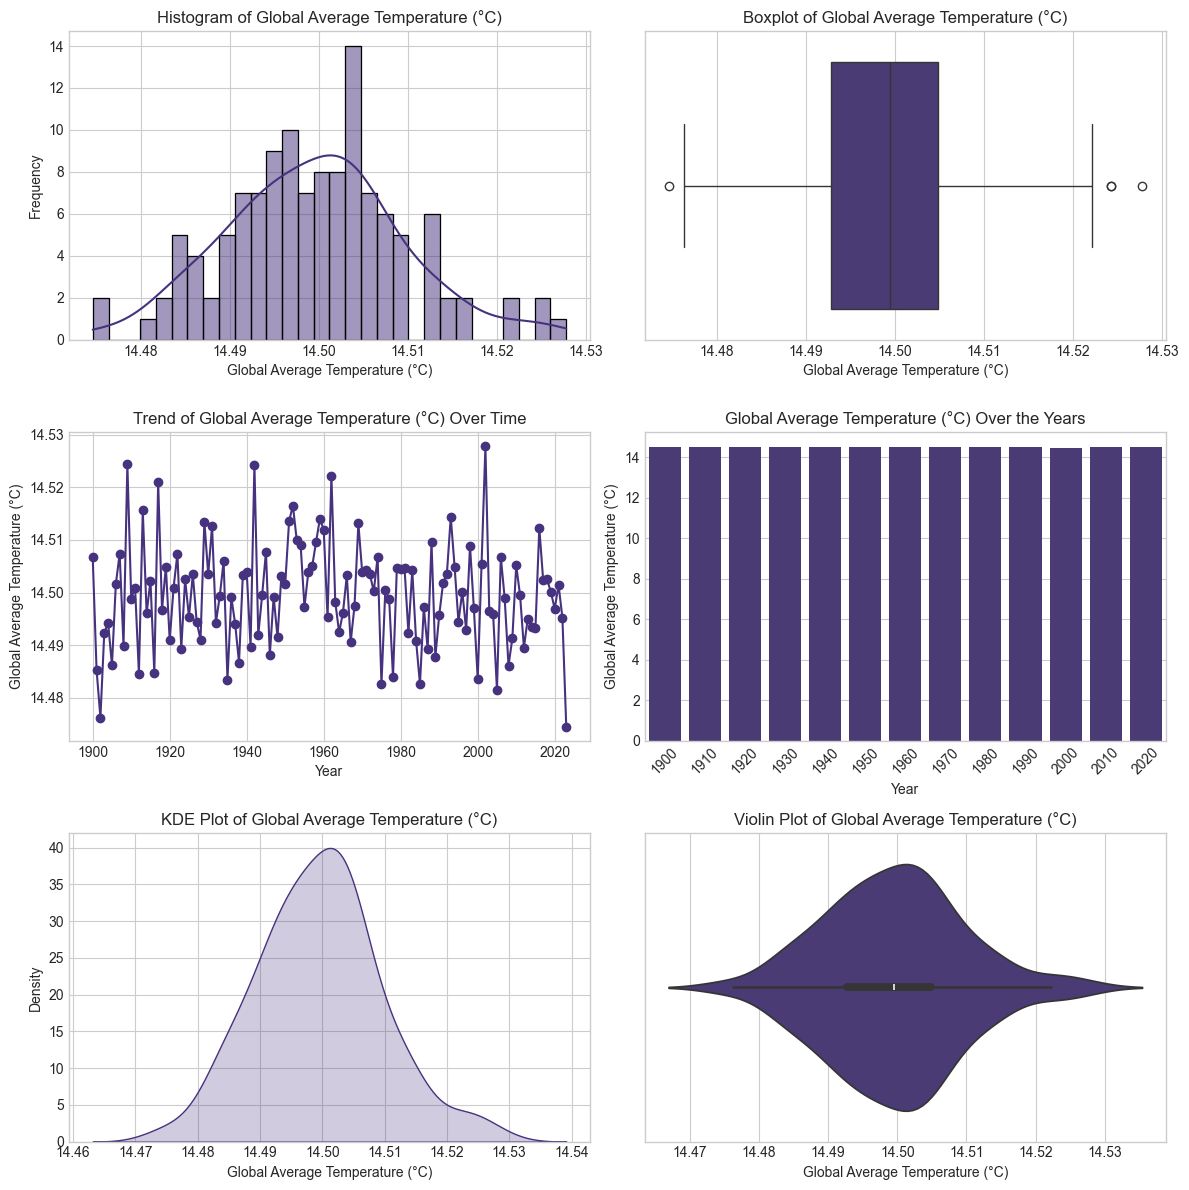

Univariate Analysis for CO2 Concentration (ppm) 
 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64 

Creating plots ... 




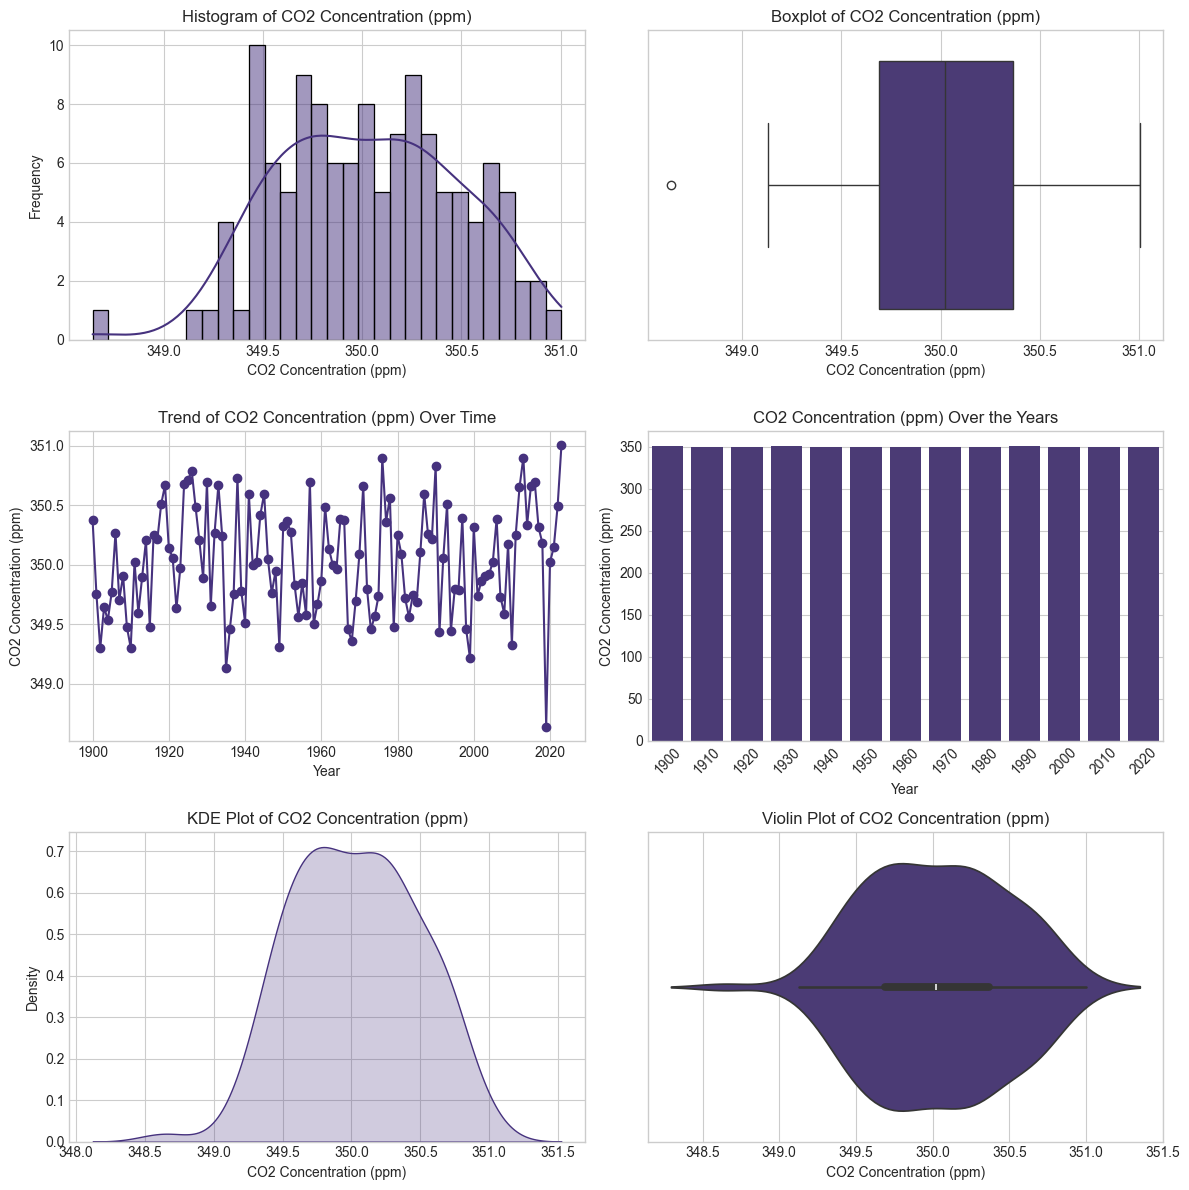

Univariate Analysis for Sea Level Rise (mm) 
 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64 

Creating plots ... 




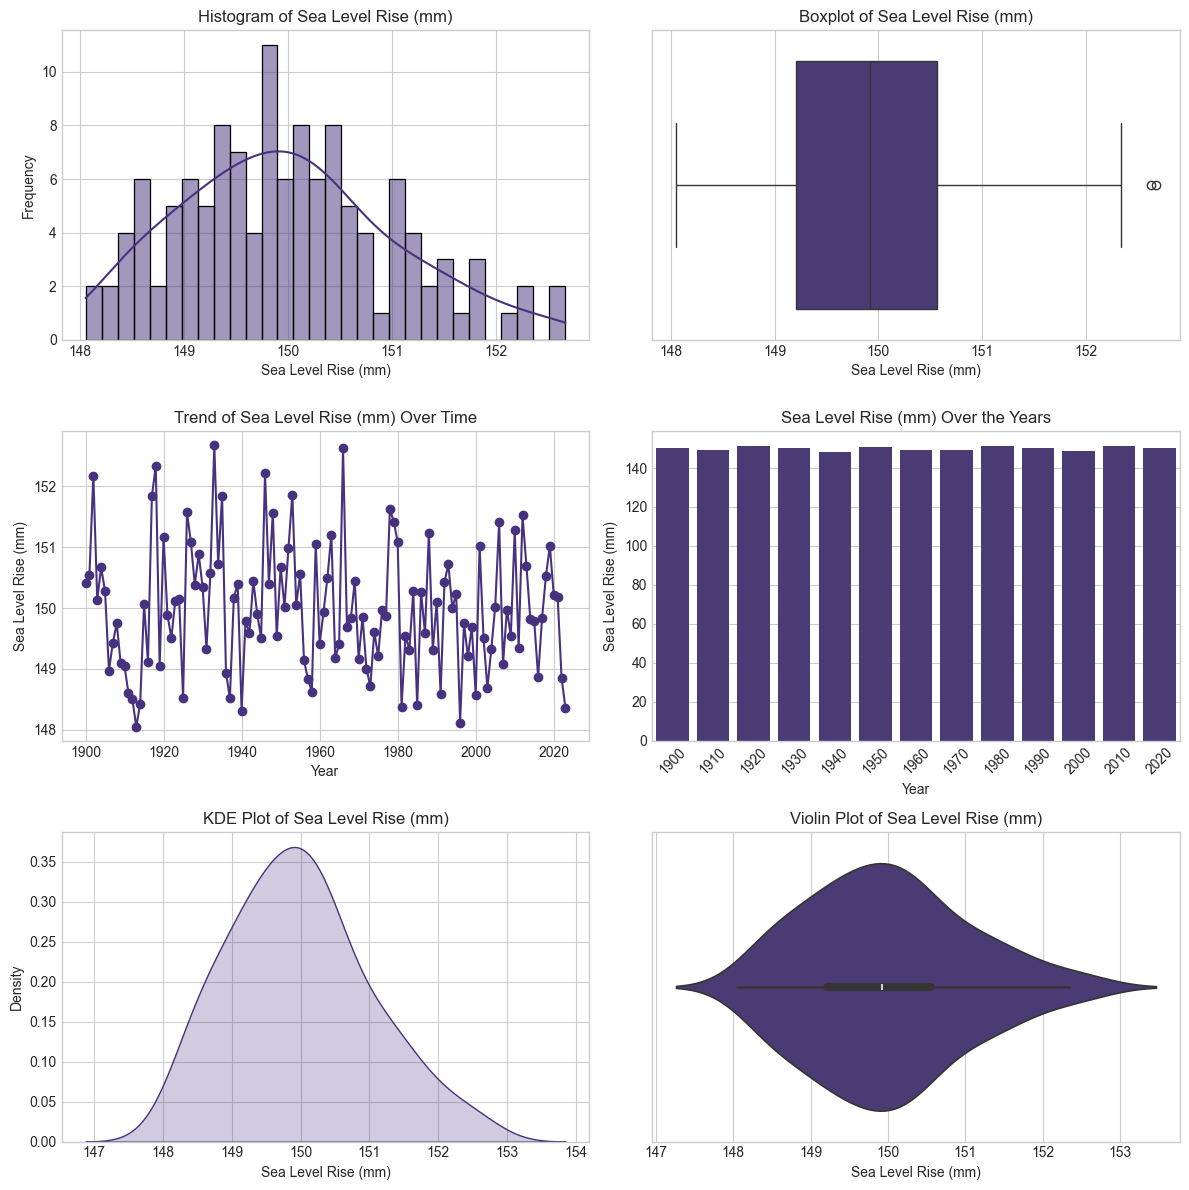

Univariate Analysis for Arctic Ice Area (million km²) 
 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64 

Creating plots ... 




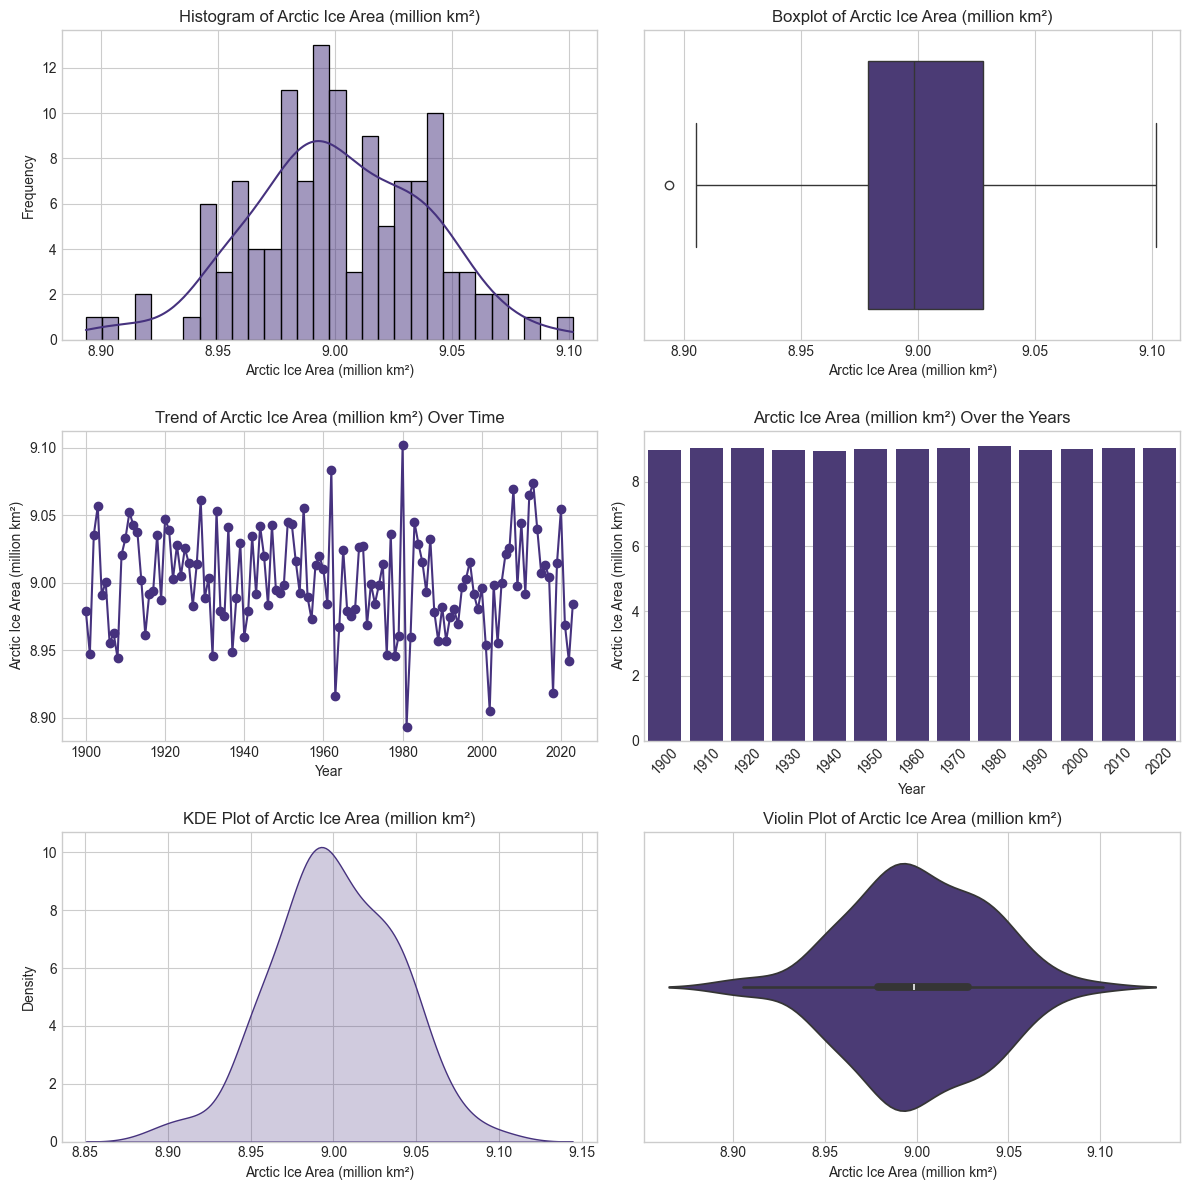

In [5]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Function to create the Histplot, Box plot, Line plot, Bar charts, KDE plots, and Violin Plot 
def univariate_analysis(df):
    for var in df.columns:
        if var != 'Year':
            print(f"Univariate Analysis for {var} \n ")
            print(df[var].describe(), "\n\nCreating plots ... \n\n")

            plt.figure(figsize=(12, 12))  # Adjust figure size

            # 1. Histogram
            plt.subplot(3, 2, 1)
            sns.histplot(data=df, x=var, kde=True, bins=30, edgecolor='black')
            plt.title(f"Histogram of {var}")
            plt.xlabel(var)
            plt.ylabel('Frequency')

            # 2. Box Plot
            plt.subplot(3, 2, 2)
            sns.boxplot(x=df[var], orient='h')
            plt.title(f"Boxplot of {var}")
            plt.xlabel(var)

            # 3. Line Plot (Trend over Time)
            plt.subplot(3, 2, 3)
            plt.plot(df['Year'], df[var], marker='o', linestyle='-')
            plt.title(f'Trend of {var} Over Time')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.grid(True)

            # 4. Bar Chart (Every 10 Years)
            plt.subplot(3, 2, 4)
            filtered_data = df[df['Year'] % 10 == 0]  # Select every 10th year
            sns.barplot(x=filtered_data['Year'], y=filtered_data[var])
            plt.title(f'{var} Over the Years')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.xticks(rotation=45)

            # 5. KDE Plot (Density Estimation)
            plt.subplot(3, 2, 5)
            sns.kdeplot(df[var], fill=True)
            plt.title(f'KDE Plot of {var}')
            plt.xlabel(var)
            plt.ylabel('Density')

            # 6. Violin Plot (Better for Distribution Analysis)
            plt.subplot(3, 2, 6)
            sns.violinplot(x=df[var])
            plt.title(f'Violin Plot of {var}')
            plt.xlabel(var)

            # Adjust layout and display all subplots together
            plt.tight_layout()
            plt.show()

# Call the function with df_yearly
univariate_analysis(df_yearly)


## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

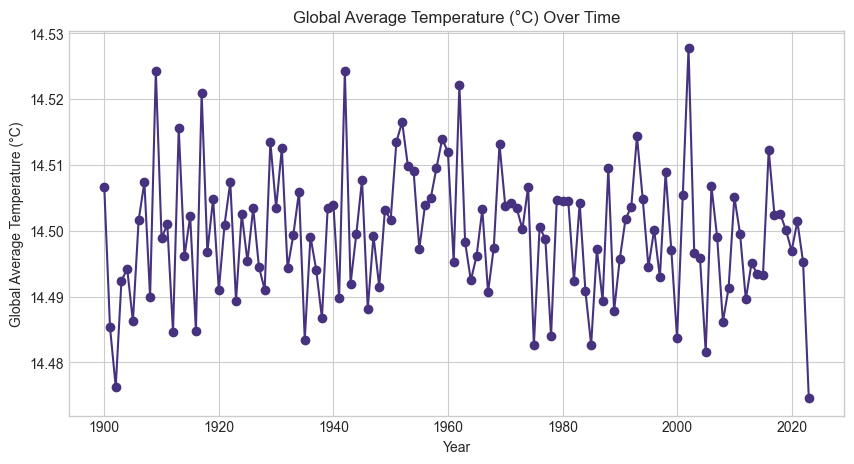

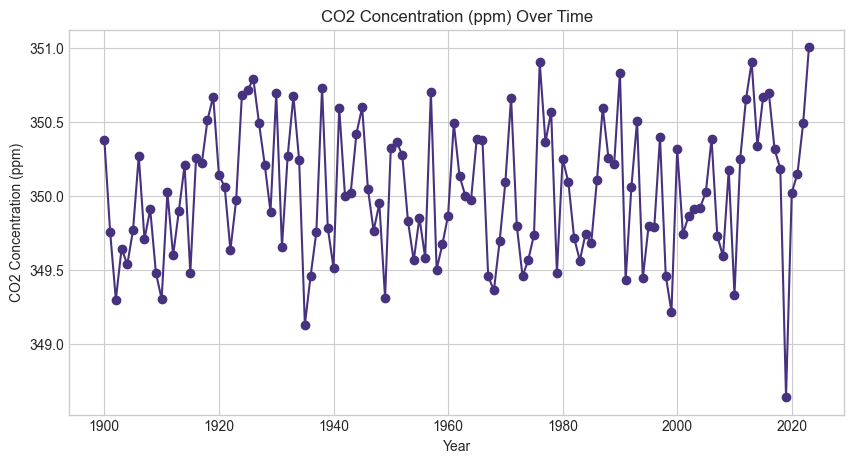

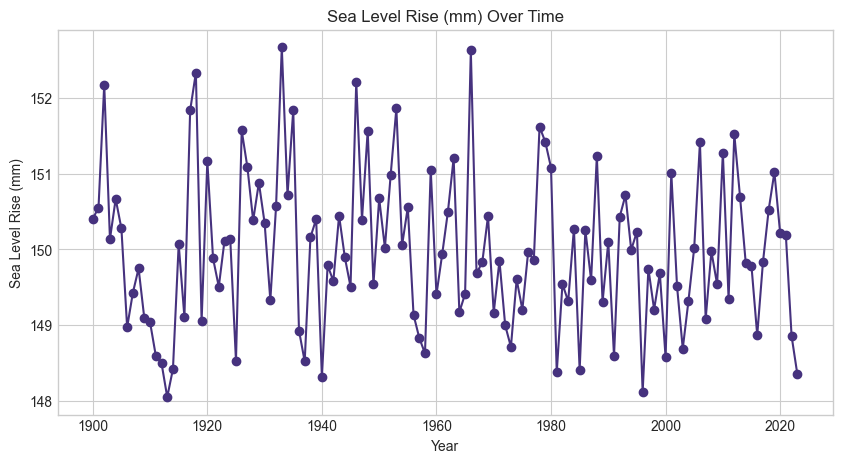

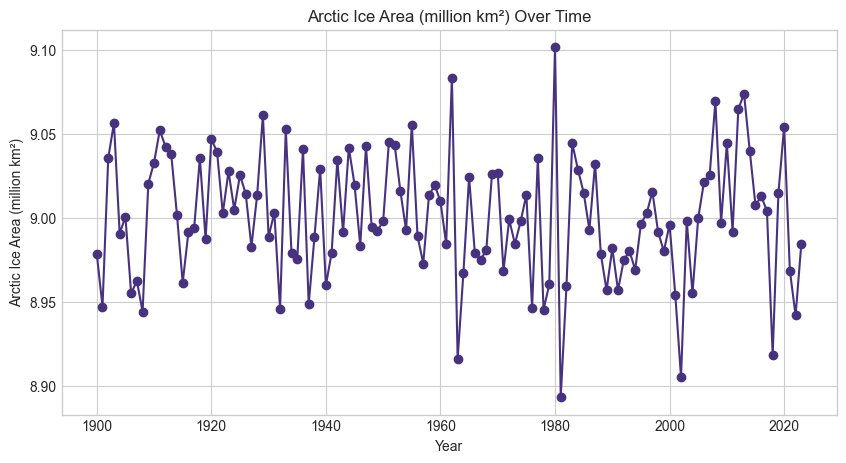

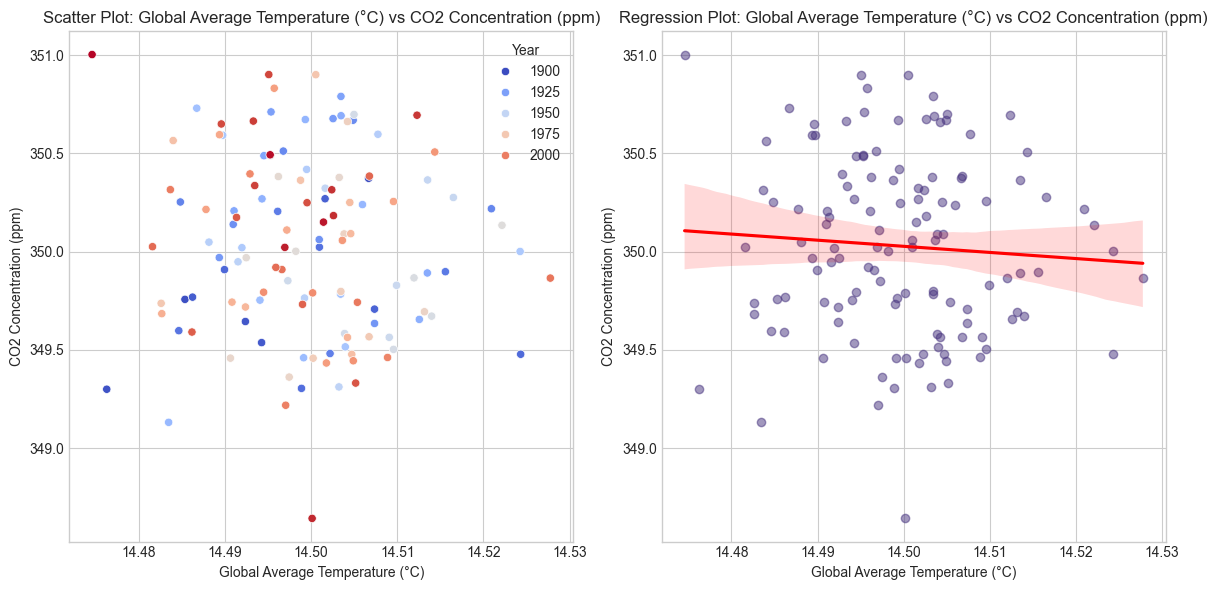

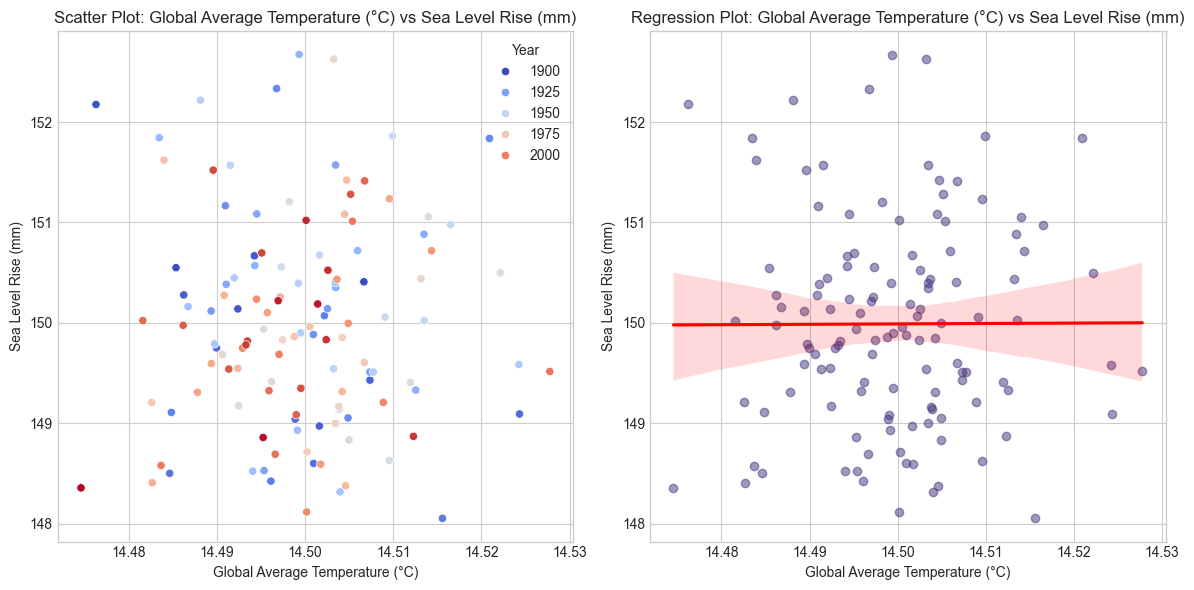

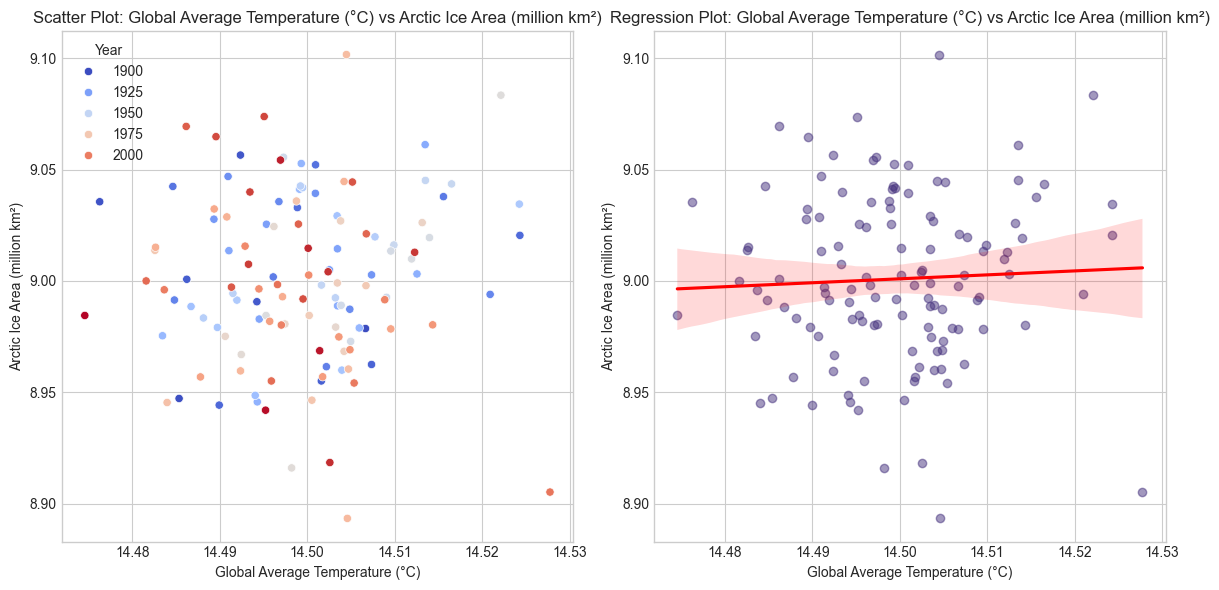

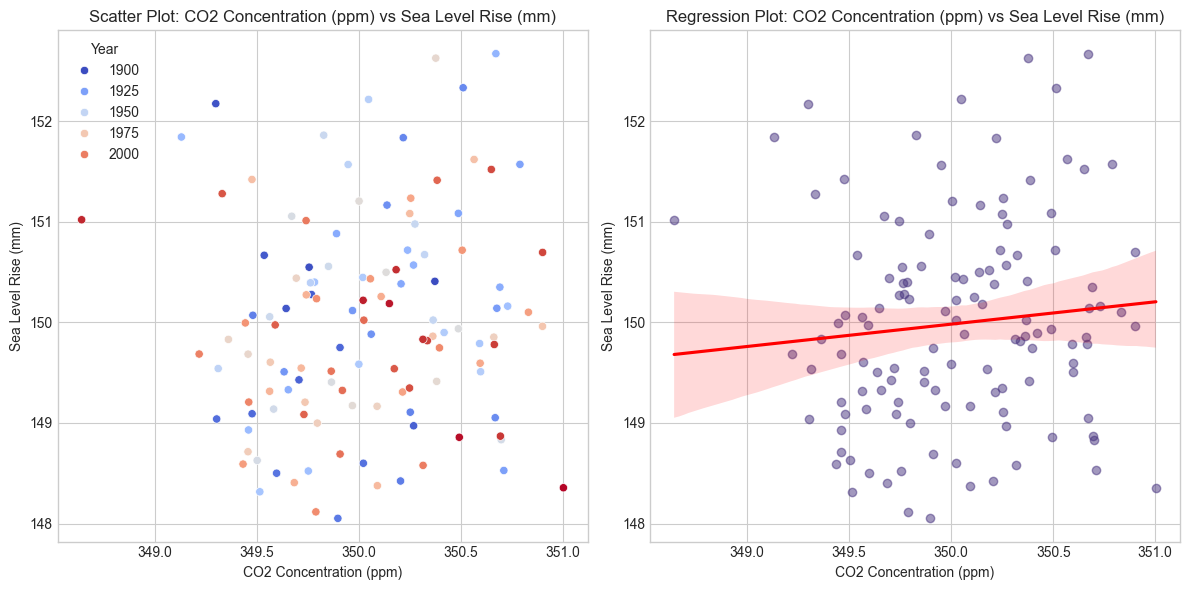

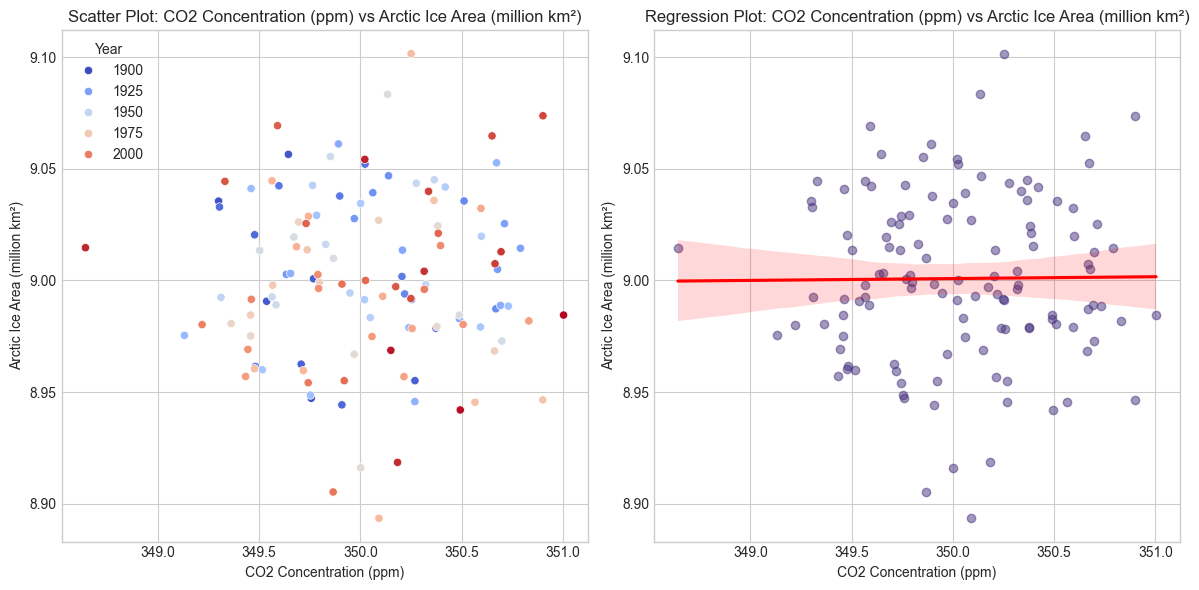

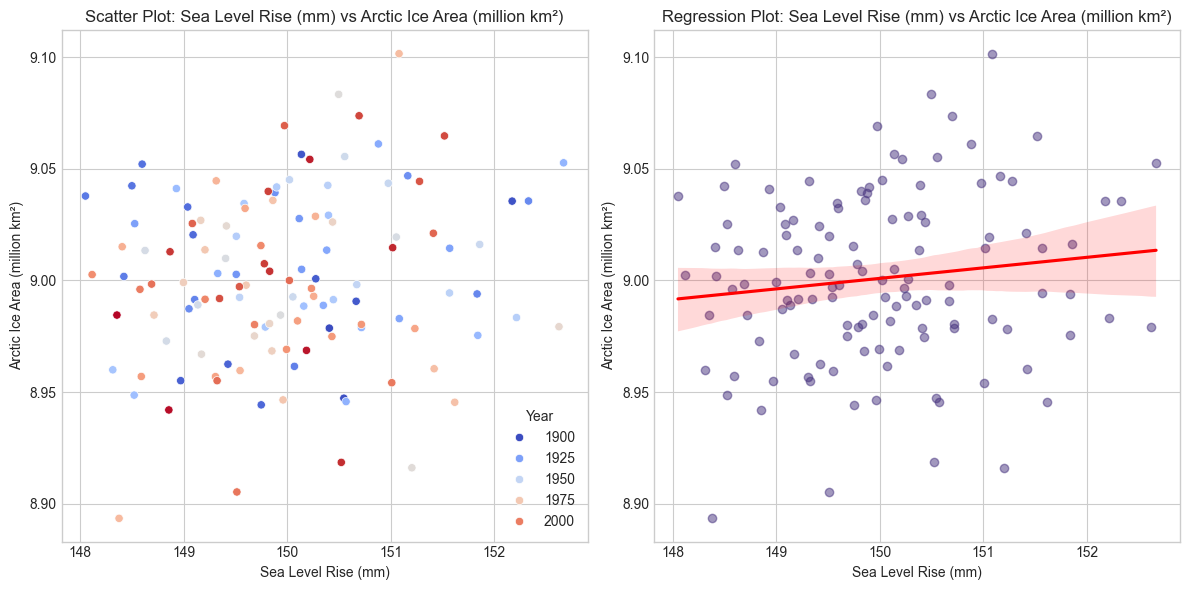

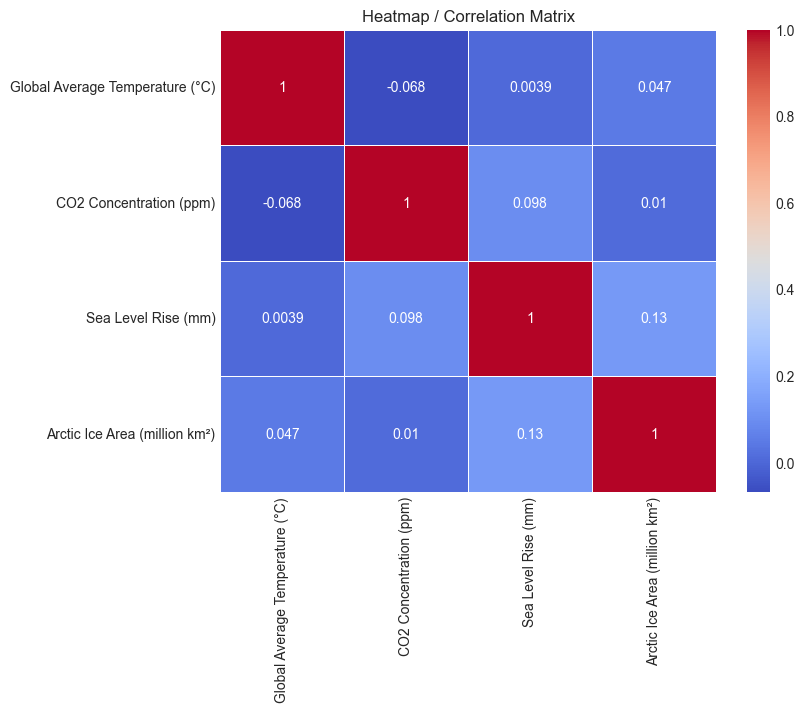

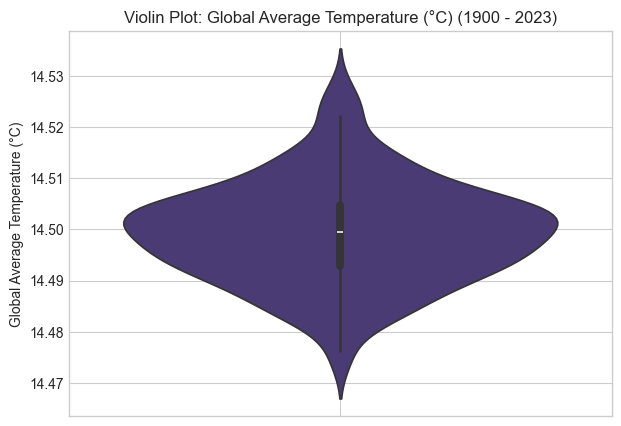

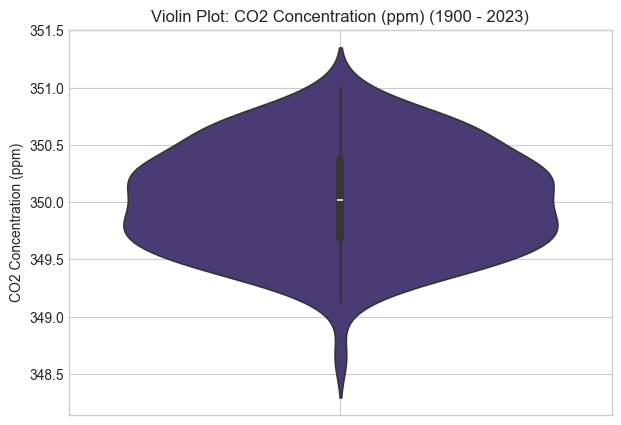

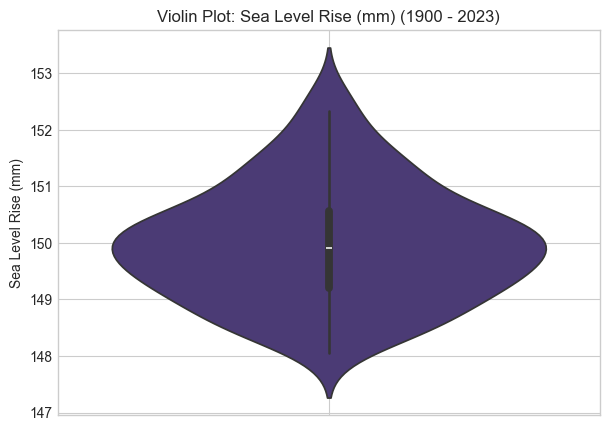

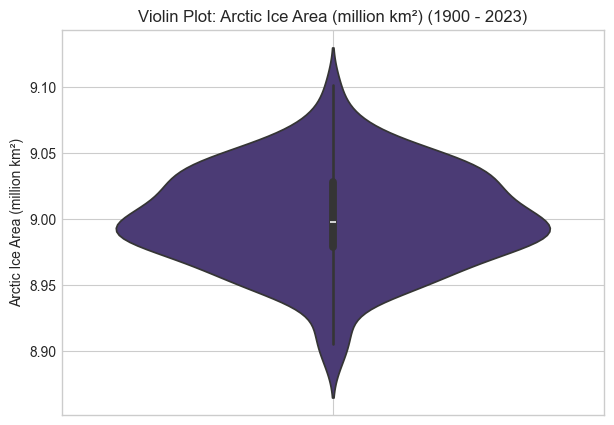

In [6]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

# Perform bivariate analysis
# Include correlation analysis and appropriate visualizations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to generate line plots for all climate variables
def bivariate_lineplot_analysis(df):
    for var in df.columns:
        if var != 'Year':
            plt.figure(figsize=(10, 5))
            plt.plot(df['Year'], df[var], marker='o', linestyle='-')
            plt.title(f'{var} Over Time')
            plt.xlabel('Year')
            plt.ylabel(var)
            plt.grid(True)
            plt.show()

bivariate_lineplot_analysis(df_yearly)

# Climate Variables
avg_temp = "Global Average Temperature (°C)"
co2_conc = "CO2 Concentration (ppm)"
sea_level_rise = "Sea Level Rise (mm)"
arctic_ice_area = "Arctic Ice Area (million km²)"
year = "Year"

# Function to create a scatter plot for bivariate analysis
def bivariate_scatterplot_analysis(ax, df, xvar, yvar):
    sns.scatterplot(x=df[xvar], y=df[yvar], hue=df[year], palette="coolwarm", ax=ax)
    ax.set_title(f"Scatter Plot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(True)

# Function to create a regression plot
def bivariate_regplot_analysis(ax, df, xvar, yvar):
    sns.regplot(x=df[xvar], y=df[yvar], scatter_kws={"alpha":0.5}, line_kws={"color":"red"}, ax=ax)
    ax.set_title(f"Regression Plot: {xvar} vs {yvar}")
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)
    ax.grid(True)

# Function that creates a subplot including both scatter plot and regplot
def bivariate_subplot_analysis(df, xvar, yvar):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
    bivariate_scatterplot_analysis(axes[0], df, xvar, yvar)
    bivariate_regplot_analysis(axes[1], df, xvar, yvar)
    plt.tight_layout()
    plt.show()

# Bivariate Analysis for Climate Variables
bivariate_subplot_analysis(df_yearly, avg_temp, co2_conc)
bivariate_subplot_analysis(df_yearly, avg_temp, sea_level_rise)
bivariate_subplot_analysis(df_yearly, avg_temp, arctic_ice_area)
bivariate_subplot_analysis(df_yearly, co2_conc, sea_level_rise)
bivariate_subplot_analysis(df_yearly, co2_conc, arctic_ice_area)
bivariate_subplot_analysis(df_yearly, sea_level_rise, arctic_ice_area)

# Heatmap (Correlation Matrix)
def create_heatmap(df):
    plt.figure(figsize=(8,6))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap / Correlation Matrix")
    plt.show()
    return corr_matrix

# Drop 'Year' before computing correlation
df_heatmap = df_yearly.drop(columns=['Year'], errors="ignore")

# Generate heatmap
create_heatmap(df_heatmap)

# Function to create a Violin Plot
def bivariate_violinplot_analysis(df, var):
    plt.figure(figsize=(7,5))
    sns.violinplot(y=df[var])
    
    # Adding features
    plt.title(f"Violin Plot: {var} (1900 - 2023)")
    plt.ylabel(var)
    plt.grid(True)  # Enabled grid for better visualization
    plt.xticks(rotation=100)
    plt.show()

# Violin plots for different climate variables
bivariate_violinplot_analysis(df_yearly, avg_temp)
bivariate_violinplot_analysis(df_yearly, co2_conc)
bivariate_violinplot_analysis(df_yearly, sea_level_rise)
bivariate_violinplot_analysis(df_yearly, arctic_ice_area)

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

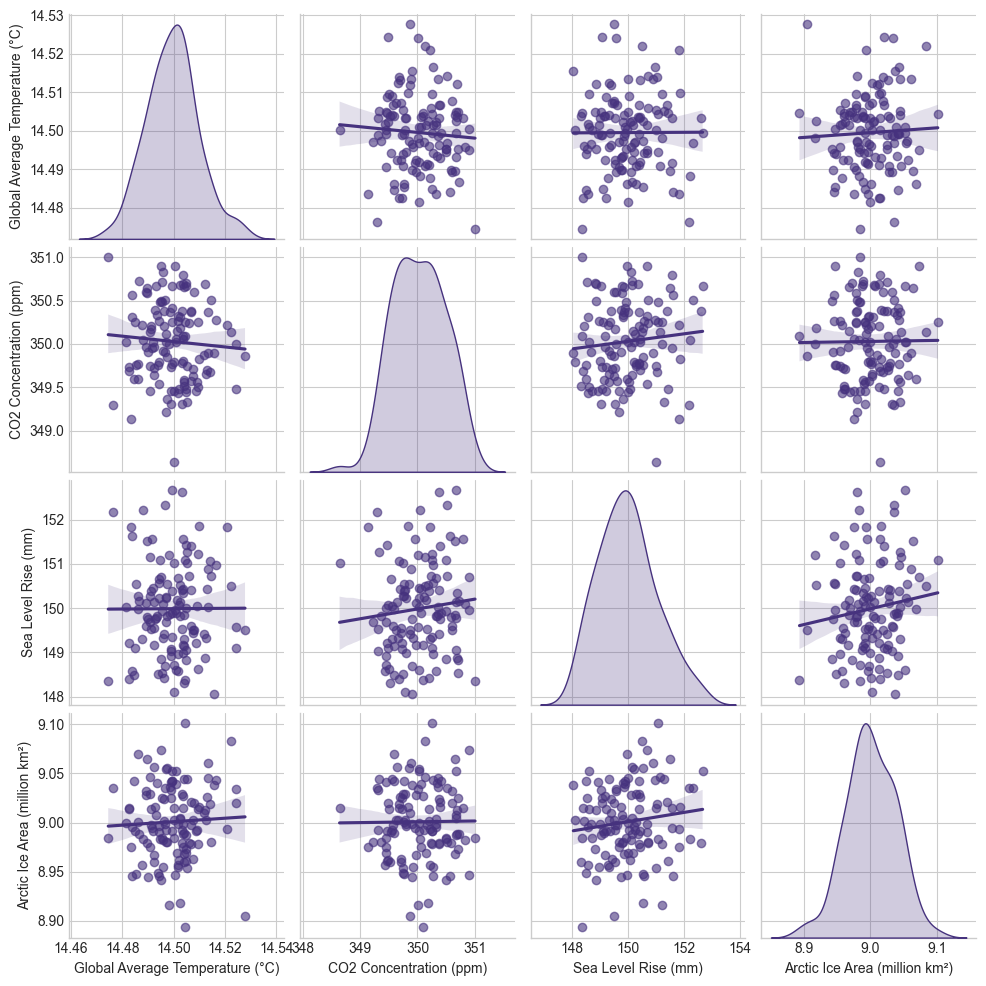

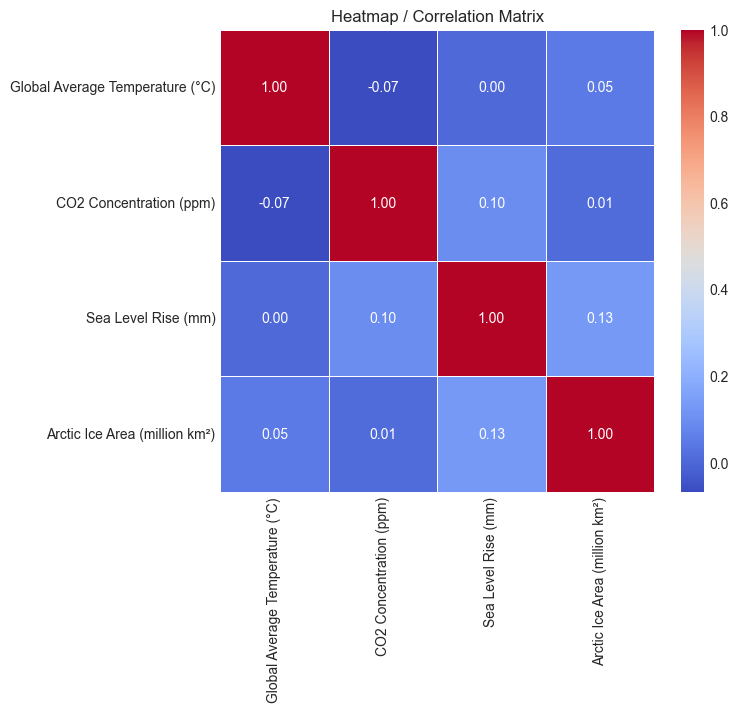

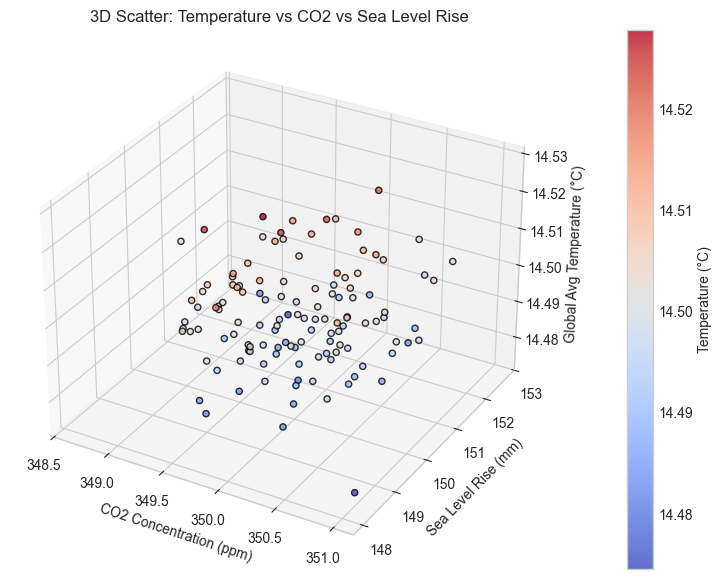

In [7]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Drop 'Year' for multivariate analysis
df_mv = df_yearly.drop(columns=['Year'])

# Display first few rows
df_mv.head()

# Pair Plot for multivariate analysis
sns.pairplot(df_mv, kind="reg", diag_kind="kde", markers="o", plot_kws={'scatter_kws': {'alpha': 0.6}})
plt.show()

# Heatmap / Correlation matrix
def create_heatmap(df):
    plt.figure(figsize=(7,6))  # Slightly increased figure size
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Heatmap / Correlation Matrix")
    plt.show()
    return corr_matrix

# Drop 'Year' column and create heatmap
df_heatmap = df_yearly.drop(columns=['Year'], errors="ignore")
create_heatmap(df_heatmap)

# 3D Scatter Plot: Temperature vs CO2 vs Sea Level Rise
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color mapping
sc = ax.scatter(
    df_yearly["CO2 Concentration (ppm)"], 
    df_yearly["Sea Level Rise (mm)"], 
    df_yearly["Global Average Temperature (°C)"], 
    c=df_yearly["Global Average Temperature (°C)"], 
    cmap="coolwarm", edgecolor="k", alpha=0.8
)

# Labels and Title for 3D Plot
ax.set_xlabel("CO2 Concentration (ppm)")
ax.set_ylabel("Sea Level Rise (mm)")
ax.set_zlabel("Global Avg Temperature (°C)")
ax.set_title("3D Scatter: Temperature vs CO2 vs Sea Level Rise")
ax.grid(True)

# Colorbar Reference
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Temperature (°C)")

plt.show()


## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
### **Key Insights**
1. **Global Temperature Increase**: There is a steady rise in temperature over the years.
2. **CO2 Concentration & Temperature**: A strong correlation between CO2 levels and temperature.
3. **Sea Level Rise**: Sea levels are rising alongside increasing temperatures and CO2 levels.
4. **Arctic Ice Decline**: Arctic ice area is shrinking as global temperatures rise.
5. **Policy Implications**: The findings highlight the urgent need for climate policies to reduce emissions.
